# Prediction using Supervised ML

# Owner:Mamta Wagh

# Mail ID:waghm9090@gmail.com

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [7]:
# Loading all the required libraries 
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
iris=load_iris()
datasetx=pd.DataFrame(iris.data[:,:])
datasetx.columns=iris.feature_names
datasetx.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [8]:
#Normalize the data
print(iris.target)
print(iris.target_names)
datasetx_norm=(datasetx-datasetx.mean())/(datasetx.std())
print(datasetx_norm.info())


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [9]:
print(datasetx_norm.iloc[:5,1])
from sklearn.cluster import KMeans
model=KMeans(n_clusters=3,random_state=20)
model.fit_predict(datasetx_norm)
print(model.cluster_centers_)   #print cluster centroids

0    1.015602
1   -0.131539
2    0.327318
3    0.097889
4    1.245030
Name: sepal width (cm), dtype: float64
[[-0.05005221 -0.88042696  0.34657675  0.28058731]
 [-1.01119138  0.85041372 -1.30063009 -1.25070352]
 [ 1.13217737  0.08812645  0.99282844  1.01412869]]


In [10]:
model=KMeans(n_clusters=3,random_state=20)
labels=model.fit_predict(datasetx_norm)
ct=pd.crosstab(iris.target,labels)
print(ct)

col_0   0   1   2
row_0            
0       0  50   0
1      39   0  11
2      14   0  36


In [11]:
datasetx_norm[labels==2].mean()

sepal length (cm)    1.132177
sepal width (cm)     0.088126
petal length (cm)    0.992828
petal width (cm)     1.014129
dtype: float64

In [12]:
#Calculate sum of squares of errors for all clusters for 3 clusters
temp=0
import numpy as np
for j in range(3):
    temp+=np.sum((datasetx_norm[labels==j]-datasetx_norm[labels==j].mean())**2).sum()
print(temp)

138.88835971735148


In [13]:
#Calculate sum of squares of errors for 0th clusster
temp=0
import numpy as np
for j in range(3):
    temp+=np.sum((datasetx_norm[labels==j]-datasetx_norm[labels==j].mean())**2).sum()

In [14]:
wsse=np.zeros(10)
for i in range(1,11):
    model=KMeans(n_clusters=i,random_state=20)
    model.fit_predict(datasetx_norm)
    labels=model.fit_predict(datasetx_norm)
    ct=pd.crosstab(iris.target,labels)
    for j in range(i):
        temp+=np.sum((datasetx_norm[labels==j]-datasetx_norm[labels==j].mean())**2).sum()
    print("number of clusters = ",i," Mean squarred Error Sum =", temp)
    wsse[i-1]=temp
    temp=0

number of clusters =  1  Mean squarred Error Sum = 734.8883597173515
number of clusters =  2  Mean squarred Error Sum = 220.8792935985897
number of clusters =  3  Mean squarred Error Sum = 138.88835971735148
number of clusters =  4  Mean squarred Error Sum = 113.54277129644385
number of clusters =  5  Mean squarred Error Sum = 90.2278160744687
number of clusters =  6  Mean squarred Error Sum = 80.97628723407989
number of clusters =  7  Mean squarred Error Sum = 71.33837730096539
number of clusters =  8  Mean squarred Error Sum = 62.44699438642031
number of clusters =  9  Mean squarred Error Sum = 53.81279472358277
number of clusters =  10  Mean squarred Error Sum = 47.15757337695784


In [15]:
#Above Elbow chart can be drwan in shortcut as below:
ks=range(1,11)
inertias=[]
for k in ks:
    model=KMeans(n_clusters=k)
    model.fit(datasetx_norm)
    inertias.append(model.inertia_)


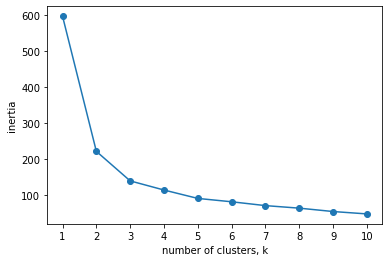

In [16]:
plt.plot(ks,inertias,'-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

# Using the elbow curve , we can easily find out 3 is the minimum number of cluster to choose